In [0]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 

from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D,ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import concatenate
from keras.utils import plot_model
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import SGD

import scipy.io
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
from datetime import datetime


# 1. 데이터셋을 피씨에 다운로드 받아주세요 

아래의 다운로드 링크를 눌러주세요


[다운로드 링크](https://drive.google.com/open?id=1nUsR-UuOyUOq4TO-pxpnKuv1UUE-C9CY)


# 2.1 다운받은 데이터.zip를 PC에서 불러오기

In [0]:
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

Saving data_3000.zip to data_3000.zip
User uploaded file "data_3000.zip" with length 3309996 bytes


# 2.2 다운받은 데이터.zip 구글 드라이브에서 불러오기

In [0]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# 3. 데이터 압축풀기

In [0]:
! mkdir data_3000
! unzip data_3000.zip -d ./data_3000

# 4. 데이터 전처리

0


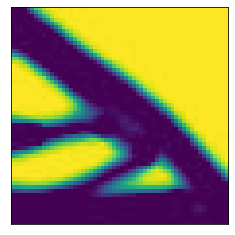

ValueError: ignored

In [0]:
# 압축해제된 데이터 경로를 찾아 복사해서 붙여넣어주세요
src = './data_3000/'

# 이미지 읽기 및 출력
def img_read_plot(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.xticks([]) # x축 눈금
    plt.yticks([]) # y축 눈금
    plt.show()
    return img

#이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

#src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

X,Y = [],[]
count = 0

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 

for file in files:
  # 데이터의 일부분만 확인해봅니다.
  if count < 10 : 
    print(count)
    X.append(img_read_plot(src,file)/255.)
    Y.append(float(file[:-4]))
    count+=1
  else : 
    X.append(img_read(src,file)/255.)
    Y.append(float(file[:-4]))

print('X_shape:',np.shape(X[0]),'Y_shape:',np.shape(Y[0]))
print('X_list shape:',np.shape(X),'Y_list shape:',np.shape(Y))

# Train set, Test set으로 나누기 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=1,shuffle=True)
print(np.shape(X_train),np.shape(Y_train),np.shape(X_test),np.shape(Y_test))

In [0]:
int(file[:-4])

ValueError: ignored